<a href="https://colab.research.google.com/github/Nascent-bot/ML-Projects/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Using Artificial Neural Networks!!

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
from plotly.offline import init_notebook_mode,iplot
cf.go_offline()
%matplotlib inline
plotly.io.renderers.default = 'colab'

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [149]:
configure_plotly_browser_state()
init_notebook_mode(connected=False)

In [0]:
##oops This Dataset has Large No.of Features Let's Read the DataFrame
df=pd.read_csv("https://raw.githubusercontent.com/Nascent-bot/ML-Projects/master/kc_house_data.csv")

In [151]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [152]:
df.shape

(21597, 21)

oops it's a quite Large Dataset

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Text(0.5, 1.0, 'Distrubution of Price')

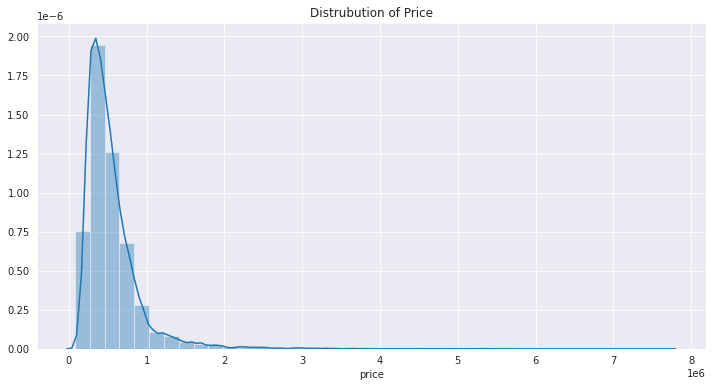

In [154]:
#Here Price is our Target Column Let's Explore the distrubution of Price Feature
plt.figure(figsize=(12,6))
sns.distplot(df['price'],bins=40)
plt.title('Distrubution of Price')


It's Clear that Most of the House price is Less than 2Million and There are very Few houses That Are Greater than 3M 

In [155]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Great We dont need to deal with Missing Values Here!

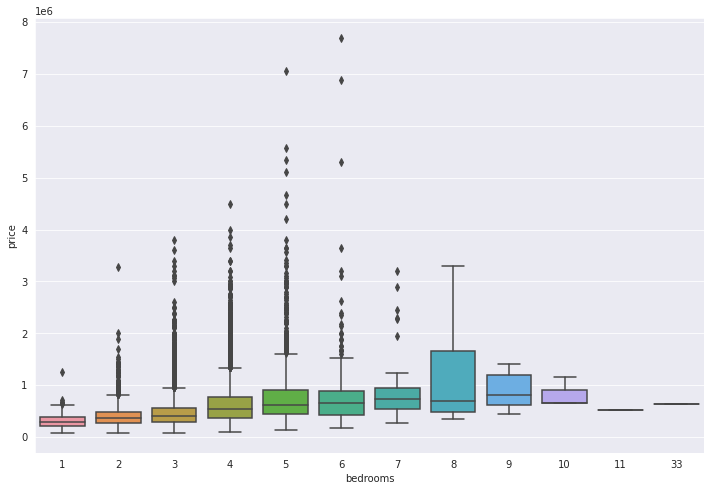

In [156]:
#Let's Explore the Price of the House Based on the Number of Bedroom
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

In [157]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [158]:
#Though above boxplot Does'nt Convey Much Meaning Let's Do it in Other Way
df.groupby('bedrooms').mean()['price']

bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

Above Gives The Average Price of the Different BedRoom Houses

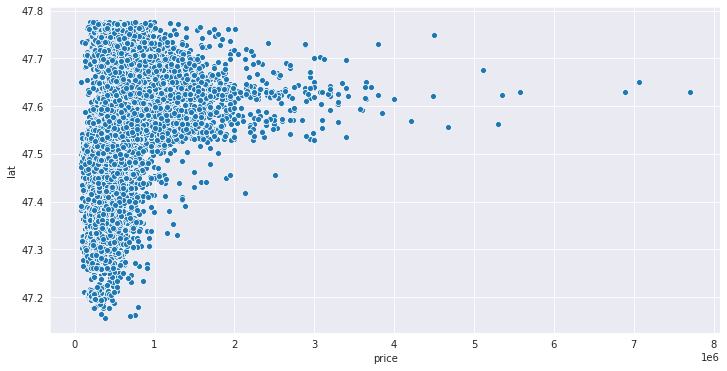

In [159]:
#let's Explore the Price of the Houses With Respect to Lattitude
plt.figure(figsize=(12,6))
sns.scatterplot(x='price',y='lat',data=df)

We Found That Most of the High Price Houses are in Particular Latitude This Might Due to Many Reasons,It can be River Side BasicallyOur Dataset is based on Seattle Housing Price

Lets Explore The long vs lat and hue as Price

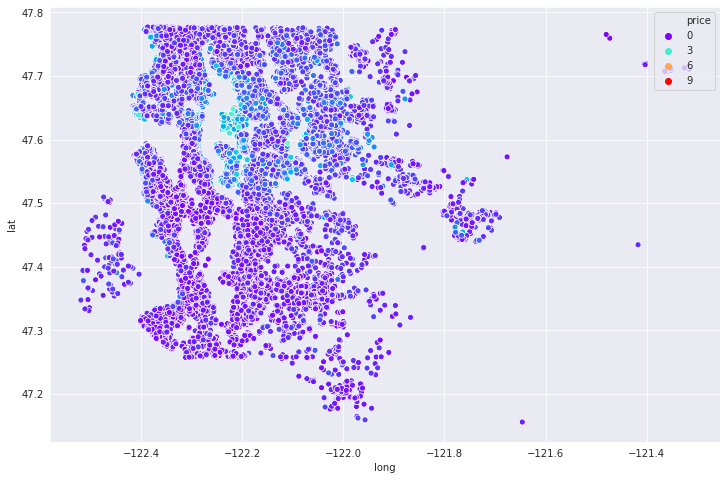

In [160]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.scatterplot(data=df,x='long',y='lat',hue='price',palette='rainbow')
plt.legend(loc='upper right')

Most of the Houses in lat=47.6 to 47.7 and long=-122.2 is of High Price This can be Due to River Side or anything Else!!

In [161]:
#Our Data Consists of Few Data points of Price > 4M so Lets Make our Model that Predits the Price of the Houses Less than 4M
df.sort_values(by='price',ascending=False)['price'][:10]

7245    7700000.0
3910    7060000.0
9245    6890000.0
4407    5570000.0
1446    5350000.0
1313    5300000.0
1162    5110000.0
8085    4670000.0
2624    4500000.0
8629    4490000.0
Name: price, dtype: float64

In [162]:
#Approximately 10% of the data is going to be removed and let's create a new df
df.shape[0]

21597

In [0]:
non_df=pd.DataFrame(df.sort_values(by='price',ascending=False)[216:])

In [164]:
non_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


In [165]:
non_df.shape

(21381, 21)

# Feature Engineering

In [0]:
#id column is of no Use Let's Remove it
non_df.drop('id',axis=1,inplace=True)

In [167]:
non_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


In [168]:
#We can Create Substantial Information From Date Feature Like Month and Year
non_df['date']=pd.to_datetime(non_df['date'])
non_df['date'][0]
#Now its Converted to Time Stamp From String Type

Timestamp('2014-10-13 00:00:00')

In [0]:
#Lets Extract Month and Year From Date
non_df['Month']=non_df['date'].apply(lambda month:month.month)
non_df['Year']=non_df['date'].apply(lambda year:year.year)

In [170]:
#let's Explore
non_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,2014-06-02,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347,6,2014
12271,2014-10-15,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486,10,2014
9166,2015-02-13,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560,2,2015
12565,2015-04-22,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237,4,2015
1150,2015-04-21,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868,4,2015


In [0]:
#Now let's Drop Original Date Column
non_df.drop('date',axis=1,inplace=True)

In [172]:
non_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347,6,2014


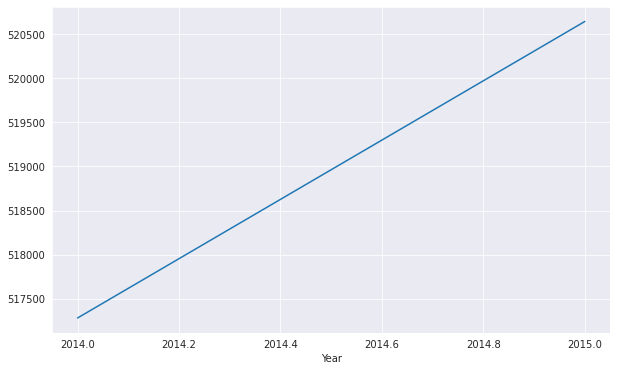

In [173]:
#Now Let's Explore the Price of House Vs Year
plt.figure(figsize=(10,6))
non_df.groupby('Year').mean()['price'].plot()

Its Quiet Obvious that As the year goes Price of the Houses Increases

In [0]:
#Let's Drop the Zipcode Column
non_df.drop('zipcode',axis=1,inplace=True)

In [175]:
non_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Month,Year
6329,1970000.0,4,3.5,4370,8510,2.0,0,1,3,10,3610,760,2003,0,47.5876,-122.204,2960,10347,6,2014


# Pre Processing

In [0]:
X=non_df.drop('price',axis=1)
y=non_df['price']

Lets Split the Data Into Train Test Split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

We Need To Scale our Data Before We Feed into Our Model So let's Do it

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [179]:
#Now our Entire Data Set is Scaled Using Standerd Scaler Let's Print this
scaled_df=pd.DataFrame(X_train)
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.676239,-0.794120,-0.810811,-0.167956,-0.905182,-0.069528,-0.294855,0.901494,-0.54607,-0.520636,-0.665552,-0.402989,-0.206303,0.153391,0.129735,-0.054847,-0.164745,0.137392,-0.690831
1,-0.392461,-1.461544,-0.717633,-0.283557,-0.905182,-0.069528,-0.294855,-0.630094,-0.54607,-0.990096,0.382352,-0.812037,-0.206303,0.918134,-0.864142,-0.775352,-0.296428,1.425748,-0.690831


# ANN Model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

Lets Create a Neural Network:


*   We First Create a Input Layer based on the Number of Features i.e 18 except the target column
*   Next we Decide Number of Hidden Layers Here 3 hidden layers is Used


*   Final Layer Conatins only one Neuron its Because We get 1 Value as the Output
*   I added Dropout Layers after every Dense its Because Dropout layers Turns Off the Certain Percentage of neurons After Every Epoch
Here 1 Epoch Means 1 Pass Over the Entire Dataset




*   And I also Defined Batch Size as 128 Because our Dataset is Quite Large So it will read the Training Data In Batches
*   I included Early Stopping Mechanism Just to Prevent Over fitting What it does is that When there is no further Substantial Decrease in Loss Function it Stops the Training Thus Preventing Overfitting


*   Finally Compiled the model using Rectifier Linear Unit as my Activation Function and I used Adam Optimizer












In [182]:
model=Sequential()
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train,batch_size=128,verbose=1,callbacks=[stop],validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
117/117 [==============================] - 0s 3ms/step - loss: 346871332864.0000 - val_loss: 356843749376.0000
Epoch 2/600
117/117 [==============================] - 0s 2ms/step - loss: 345657475072.0000 - val_loss: 352101924864.0000
Epoch 3/600
117/117 [==============================] - 0s 2ms/step - loss: 324088922112.0000 - val_loss: 297683025920.0000
Epoch 4/600
117/117 [==============================] - 0s 2ms/step - loss: 222030823424.0000 - val_loss: 143680438272.0000
Epoch 5/600
117/117 [==============================] - 0s 2ms/step - loss: 120706637824.0000 - val_loss: 80954777600.0000
Epoch 6/600
117/117 [==============================] - 0s 2ms/step - loss: 97115742208.0000 - val_loss: 63656570880.0000
Epoch 7/600
117/117 [==============================] - 0s 2ms/step - loss: 87615488000.0000 - val_loss: 53953564672.0000
Epoch 8/600
117/117 [==============================] - 0s 2ms/step - loss: 82346991616.0000 - val_loss: 49769279488.0000
Epoch 9/600
117/117 [==

Our Model Stoped its Training after 106 epochs Just Because we Used Early Stopping Mechanism!! Let's Check out Training and Validation Error

In [187]:
model_loss=pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,3.468713e+11,3.568437e+11
1,3.456575e+11,3.521019e+11
2,3.240889e+11,2.976830e+11
3,2.220308e+11,1.436804e+11
4,1.207066e+11,8.095478e+10


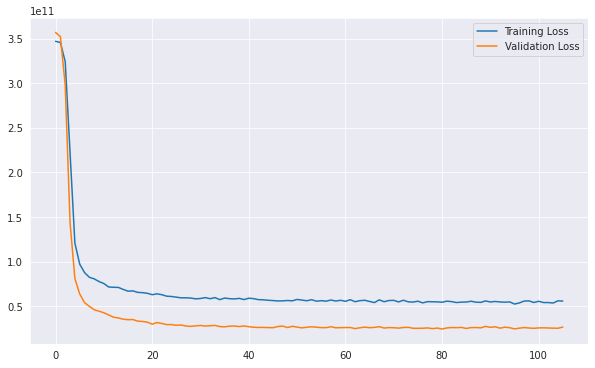

In [188]:
plt.figure(figsize=(10,6))
plt.plot(model_loss['loss'],label='Training Loss')
plt.plot(model_loss['val_loss'],label='Validation Loss')
plt.legend()

Great Our Model Prevented Overfitting Lets Predict and Evaluate the Model!!

In [0]:
pred=model.predict(X_test)

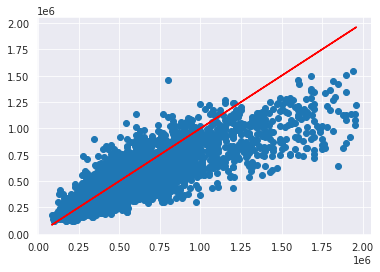

In [221]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [222]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
mean_absolute_error(y_test,pred)

108245.49658515198

In [223]:
np.sqrt(mean_absolute_error(y_test,pred))

329.0068336450658

What Does it Mean Actually!! It Looks Cipher let's Decode!!

In [224]:
non_df['price'].describe()

count    2.138100e+04
mean     5.183675e+05
std      2.849428e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.970000e+06
Name: price, dtype: float64

Our Dataset Tells that Average Price of the House is 5.1 Million our model had a Mean Absolute Error of 100k which means our model is off by 100K dollars which is not a big Deal.Now Our Model has the Capablity to Predict the actual Price of a house When the new Features are Given But off by +- 10k$

To be Bit Clear Let's Check the Explained Variance

In [225]:
explained_variance_score(y_test,pred)

0.7249125066092801

It Tells us that 72% of the Original Variance is retained by Our Model!!Bam!!

let's Predict Using only one House Data!!

In [0]:
x=non_df.drop('price',axis=1).iloc[1]


Now I have the Features of One House Let's Predict the Price of the House Using Our Model!
But Before that Let's Reshape Our Data

In [237]:
x=x.values.reshape(-1,19)
x


array([[ 5.00000e+00,  4.50000e+00,  6.20000e+03,  2.33730e+04,
         3.00000e+00,  0.00000e+00,  1.00000e+00,  4.00000e+00,
         1.10000e+01,  5.05000e+03,  1.15000e+03,  1.98800e+03,
         0.00000e+00,  4.75632e+01, -1.22215e+02,  3.70000e+03,
         1.44860e+04,  1.00000e+01,  2.01400e+03]])

In [238]:
x=sc.transform(x)
x

array([[ 1.74493972,  3.21041946,  4.83808939,  0.21076327,  2.82137123,
        -0.06952813,  1.08199472,  0.90149408,  2.98568834,  4.17396371,
         2.01242398,  0.58554309, -0.20630254,  0.02784653, -0.00514859,
         2.60201466,  0.07407653,  1.103659  , -0.69083142]])

In [239]:
predic=model.predict(x)
predic

array([[1369721.2]], dtype=float32)

In [245]:
non_df['price'].iloc[1]

1960000.0

In [242]:
abs(predic-non_df['price'].iloc[0])

array([[600278.75]], dtype=float32)

In [0]:
#Not Bad!!

## **THANK YOU!!**